In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
trdf=pd.read_csv('Bigmart_train.csv')
trdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
tedf=pd.read_csv('Bigmart_test.csv')
tedf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
print('Train\t\t Test \n\t\t\n',trdf.shape,tedf.shape)

Train		 Test 
		
 (8523, 12) (5681, 11)


Missing values of each column by number and %

In [6]:
print('Train:\n')
print(trdf.isnull().sum().sort_values(ascending=False),'\n\n',trdf.isnull().sum()/trdf.shape[0]*100)
print('Test:\n')
print(tedf.isnull().sum().sort_values(ascending=False),'\n\n',tedf.isnull().sum()/tedf.shape[0]*100)

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64
Test:

Outlet_Size                  1606
Item_Weight                   976
Outlet_Typ

Percentage of missing value of below columns are approx same for both datasets

Item_weight =  17%
Outlet_size =  28%



Since outlet_size is categorical value, we can replace null values with mode of the column

In [9]:
#Checking value counts of outlet_size
print('Outlet_Size:\n',trdf.Outlet_Size.value_counts(),"\n\n")
print('Outlet_Size:\n',tedf.Outlet_Size.value_counts(),"\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Outlet_Size:
 Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 




We fill null values of Outlet_Size column with Medium since it is the mode value.

In [11]:
print('test_mode,train_mode\n',[trdf['Outlet_Size'].mode().values[0],tedf['Outlet_Size'].mode().values[0]])

test_mode,train_mode
 ['Medium', 'Medium']


In [12]:
trdf['Outlet_Size']=trdf['Outlet_Size'].fillna(trdf['Outlet_Size'].dropna().mode().values[0])
tedf['Outlet_Size']=tedf['Outlet_Size'].fillna(tedf['Outlet_Size'].dropna().mode().values[0])

In [13]:
trdf['Outlet_Size'].isnull().sum()
tedf['Outlet_Size'].isnull().sum()

0

Now for Item_Weight, since it is numerical value, we check for outliers frst

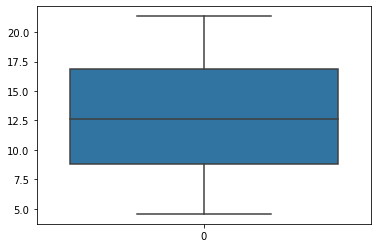

In [17]:
sns.boxplot(data=trdf['Item_Weight'])

Since there are no outliers, we fill the null values with mean of the column

In [18]:
trdf['Item_Weight']=trdf['Item_Weight'].fillna(trdf['Item_Weight'].dropna().mean())
tedf['Item_Weight']=tedf['Item_Weight'].fillna(tedf['Item_Weight'].dropna().mean())

In [19]:
trdf['Item_Weight'].isnull().sum()
tedf['Item_Weight'].isnull().sum()

0

In [20]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
tedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Splitting data into categorical and numerial values

In [23]:
num=trdf.select_dtypes('number').columns.to_list()
cat=trdf.select_dtypes('object').columns.to_list()
trdf[num]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [24]:
trdf[cat]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [25]:
print(num)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [26]:
print(cat)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [27]:
bm_num=trdf[num]
bm_cat=trdf[cat]

In [28]:
[trdf[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT035    930
 OUT046    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

Repeating values with different names can be replaced

In [36]:
trdf['Item_Fat_Content'].replace(['LF','low fat','reg','Regular','Low Fat'],['lowfat','lowfat','regular','regular','lowfat'],inplace=True)

In [37]:
tedf['Item_Fat_Content'].replace(['LF','low fat','reg','Regular','Low Fat'],['lowfat','lowfat','regular','regular','lowfat'],inplace=True)

In [38]:
trdf.Item_Fat_Content.value_counts()


lowfat     5517
regular    3006
Name: Item_Fat_Content, dtype: int64

Outlet_Establishment_Year replaced with new column outlet_age

In [39]:
trdf['outlet_age'],tedf['outlet_age']=trdf['Outlet_Establishment_Year'].apply(lambda year:2020-year),tedf['Outlet_Establishment_Year'].apply(lambda year:2020-year)

In [40]:
trdf['outlet_age']

0       21
1       11
2       21
3       22
4       33
        ..
8518    33
8519    18
8520    16
8521    11
8522    23
Name: outlet_age, Length: 8523, dtype: int64

# DATA VISUALIZATION

In [41]:
print(cat)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


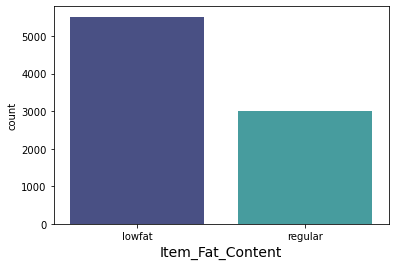

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=trdf ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

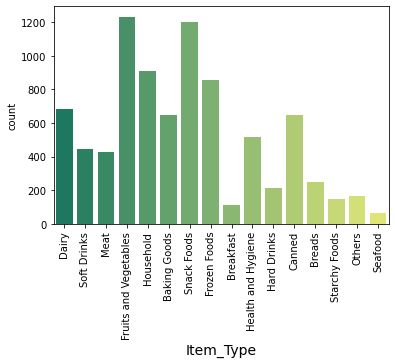

In [52]:
sns.countplot(x='Item_Type' , data=trdf ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

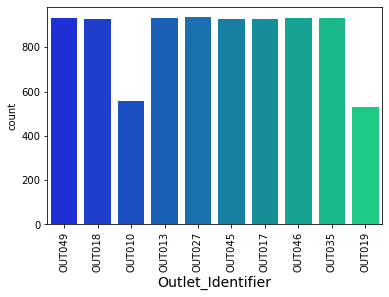

In [54]:
sns.countplot(x='Outlet_Identifier' , data=trdf ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

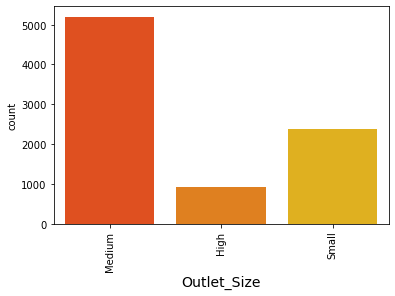

In [55]:
sns.countplot(x='Outlet_Size' , data=trdf ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

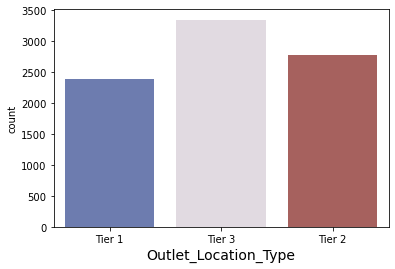

In [56]:
sns.countplot(x='Outlet_Location_Type' , data=trdf ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

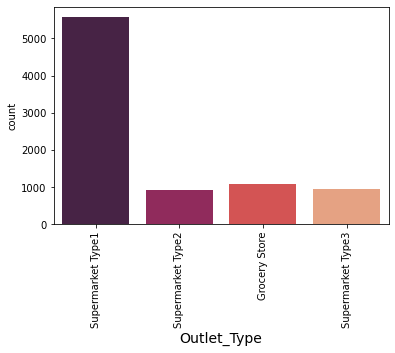

In [58]:
sns.countplot(x='Outlet_Type' , data=trdf ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

Item_Fat_Content= Low fat content is sold more.

Item_Type = Item types that are popular is fruits and vegetables,snacks.

Outlet_Identifier = Sold items are lower in outlet OUT010,OUT019.

Outlet_Size= Outlets are mostly medium sized in our data.

Outlet_Location_Type = outlets are more in Tier3.

Outlet_Type =Supermarket Type 1 is the mode outlet type.

In [59]:
# for numerical values
print(num)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


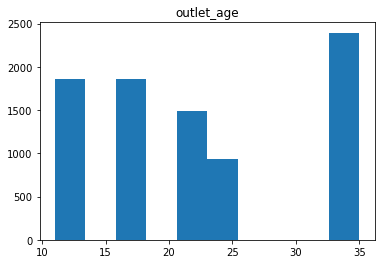

In [62]:
plt.hist(trdf['outlet_age'])
plt.title("outlet_age")
plt.show()

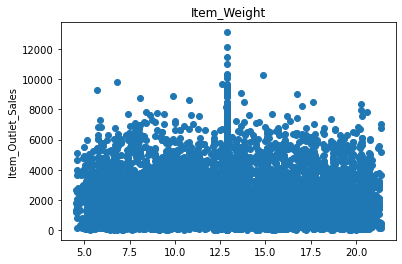

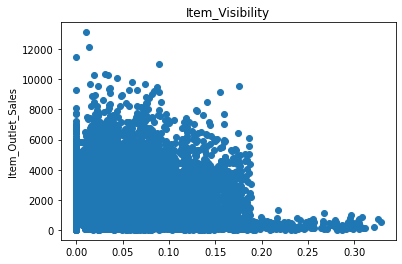

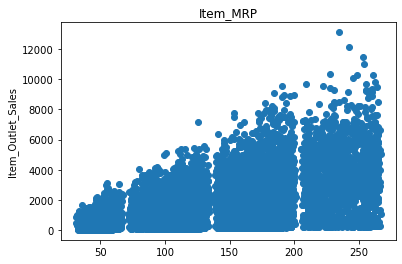

In [66]:
for numeric in bm_num[num[:3]]:
    plt.scatter(bm_num[numeric], bm_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

numeric columns realizations
 
 1.Outlet_Age - The most common outlets are 35 years old.
 
 2.Item_Weight - The data is very spreaded, no specific pattern. 
 
 3.Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are    not selling well is some cases.
 
 4.Item_MRP - Items with higher MRP tend to sell better in most cases.

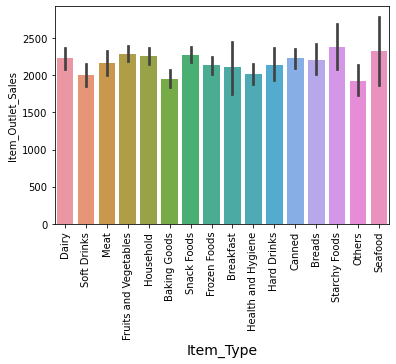

In [73]:
#multivarite plots
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=trdf)
plt.xlabel('Item_Type', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

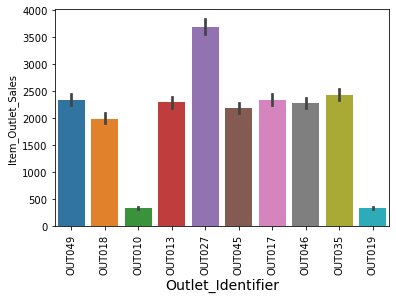

In [74]:

sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=trdf)
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

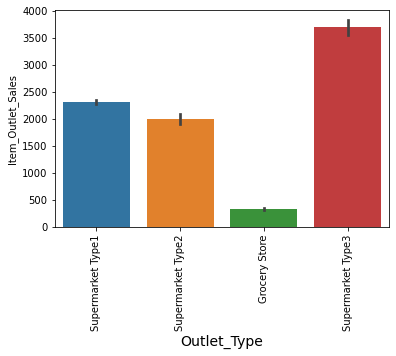

In [75]:
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=trdf)
plt.xlabel('Outlet_Type', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

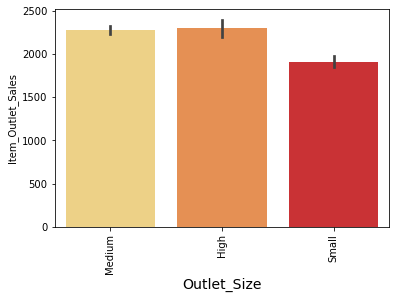

In [76]:
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=trdf ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

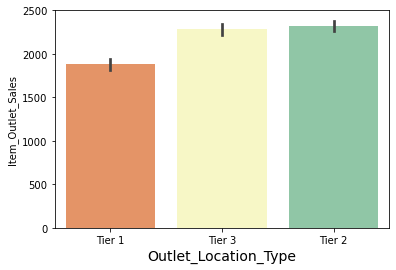

In [79]:
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=trdf ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

The difference in item types by sales is very small.

Outlet 27 is the most profitable and Outlet 10, 19 sales are less and there is a big diffrence between each specific outlet sales.

supermarket type 3 is the most profitable and grocery store is least profitable.

Medium and high outlet sizes are pretty much even in sales.

Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

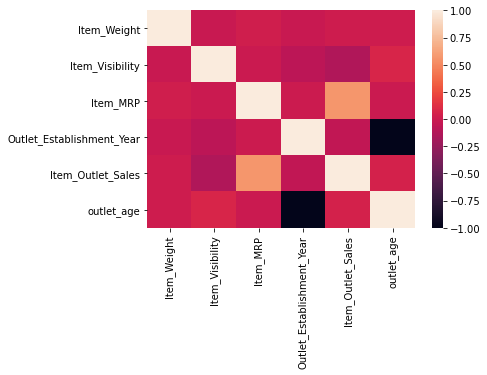

In [80]:
sns.heatmap(trdf.corr())

Item_MRP is highly correlated with Item_outlet_sales

The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them.

All Ordinal variables will be Label encoded.

The columns Outlet_Type and Item_Type will be One Hot encoded.

In [81]:
bm_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [82]:
#label encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    trdf[i] = le.fit_transform(trdf[i])
    tedf[i] = le.fit_transform(tedf[i])
    
trdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [83]:
#one hot encoder
cols = ['Item_Type','Outlet_Type']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
troh = pd.DataFrame(OH_encoder.fit_transform(trdf[cols])).astype('int64')
teoh = pd.DataFrame(OH_encoder.fit_transform(tedf[cols])).astype('int64')

In [85]:
#get feature columns
troh.columns = OH_encoder.get_feature_names(cols)
teoh.columns = OH_encoder.get_feature_names(cols)

In [86]:
# One-hot encoding removed index; put it back
troh.index = trdf.index
teoh.index = tedf.index

In [87]:
trfe = pd.concat([trdf, troh], axis=1)
tefe = pd.concat([tedf, teoh], axis=1)

In [88]:
# Dropping irrelevant columns

trfe  = trfe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
tefe = tefe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [90]:
trfe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,outlet_age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


train and test split

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models


from sklearn.linear_model import Lasso


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
y = trfe['Item_Outlet_Sales']
X = trfe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=41)

In [93]:
from sklearn.model_selection  import cross_val_score as CVS
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [96]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [97]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [99]:

lr_MAE = round(MAE(y_test, y_predict),2)
lr_MSE = round(MSE(y_test, y_predict),2)
lr_R_2 = round(R2(y_test, y_predict),4)
lr_CS  = round(CVS(lr, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {lr_MAE}\n")
print(f" Mean Squared Error: {lr_MSE}\n")
print(f" R^2 Score: {lr_R_2}\n")
cross_val(lr,LinearRegression(),X,y,5)

 Mean Absolute Error: 845.56

 Mean Squared Error: 1295905.12

 R^2 Score: 0.5537

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score: 0.558


In [100]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=41)
RFR.fit(X_train, y_train)
y_predict = RFR.predict(X_test)

In [103]:
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)


In [104]:
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1026.42

 Mean Squared Error: 1939962.49

 R^2 Score: 0.3319

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=41) Scores:
0.57
0.53
0.52
0.56
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=41) score: 0.5489


In [106]:
MAE= [lr_MAE,RFR_MAE]
MSE= [lr_MSE,RFR_MSE]
R_2= [lr_R_2,RFR_R_2]
Cross_score= [lr_CS,RFR_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
0,Linear Regression,845.56,1295905.12,0.5537,0.5580
1,Random Forest Regressor,1026.42,1939962.49,0.3319,0.5917


Item_MRP optimizes Maximum Outlet sales (positive correlation with the target).

Linear Regression have the best perfomance in most categories.

only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.